# STINTSY Machine Project - Group 5 (S18)
**Members:**

Argamosa, Daniel Cedric

Cabinbin, Pierre Genric

Kua, Miguel Carlo

Sang, Nathan Immanuel



## 1. Introduction to the Problem and Dataset
In this Notebook, we will be exploring and analyzing a dataset about [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data) from the website Kaggle, which provides insights into the social, demographic, and academic characteristics of secondary school students. The dataset was obtained from a survey conducted on students from Portuguese secondary schools who were enrolled in Math and Portuguese language courses, offering a rich foundation for exploring the factors that influence academic performance.

The primary goal is to examine how various factors, including family background, lifestyle, and alcohol consumption, relate to the culmination of their academic performance, their final grades, becoming a regression-focused study. Afterwards, another test would be finding out how big does alcohol consumption rank between all those factors. So by applying regression analysis, we aim to uncover the extent to which factors like alcohol consumption, family relationships, and study habits predict students' final grades, allowing us to quantify their impact.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.

This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

## 2. Description of the Dataset

The dataset consists of data collected from secondary school students in Portugal having a variety of demographic, academic, lifestyle, and health-related information. Specifically, the dataset surveys students enrolled in Math and Portuguese language courses, providing insights into factors that may influence their academic performance. Key attributes include family background, social habits, lifestyle choices, and alcohol consumption. The purpose of this dataset is to examine how these factors correlate with students' final grades in their courses, offering a comprehensive look at the influences on academic success.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

The dataset was created by combining two separate datasets: one for students enrolled in Math and another for students enrolled in Portuguese. After concatenating both, the new dataset has **1044** instances, from 395 Math instances and 649 Portuguese instances. For the structure of the dataset itself, each row represents a single student’s information, while each column represents a feature about the student, such as their demographic details, family background, alcohol consumption habits, academic performance, and more totaling to **33** unique features.

Here’s a breakdown of all the columns:

1. **Personal and Demographic Details:**
   - `school` - The school attended by the student (e.g., "GP" for Gabriel Pereira, "MS" for Mousinho da Silveira).
   - `sex` - Gender of the student ("F" for female, "M" for male).
   - `age` - Age of the student in years.
   - `address` - Type of student’s home location ("U" for urban, "R" for rural).
   - `famsize` - Family size indicator ("LE3" for families with three or fewer members, "GT3" for families with more than three).

2. **Family Background:**
   - `Pstatus` - Parent's cohabitation status ("T" for living together, "A" for apart).
   - `Medu` - Mother's education level (numeric: 0-4).
   - `Fedu` - Father's education level (numeric: 0-4).
   - `Mjob` - Mother's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `Fjob` - Father's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `reason` - Reason for choosing the school (nominal: "home", "reputation", "course", "other").
   - `guardian` - Parent/guardian education level (nominal: "mother", "father", "other").

3. **Lifestyle and Personal Preferences:**
   - `traveltime` - Time taken to travel to school (numeric: 1-4).
   - `studytime` - Weekly study time (numeric: 1-4).
   - `failures` - Number of past class failures (numeric: 0-4).
   - `schoolsup` - Extra educational support (binary: "yes" or "no").
   - `famsup` - Family educational support (binary: "yes" or "no").
   - `paid` - Extra paid classes within the course subject (binary: "yes" or "no").
   - `activities` - Participation in extracurricular activities (binary: "yes" or "no").
   - `nursery` - Attended nursery school (binary: "yes" or "no").
   - `higher` - Intention to pursue higher education (binary: "yes" or "no").
   - `internet` - Internet access at home (binary: "yes" or "no").
   - `romantic` - With a romantic relationship (binary: "yes" or "no").

4. **Social and Family Relations:**
   - `famrel` - Quality of family relationships (numeric: 1-5).
   - `freetime` - Amount of free time after school (numeric: 1-5).
   - `goout` - Frequency of going out with friends (numeric: 1-5).

5. **Health and Substance Use:**
   - `Dalc` - Workday alcohol consumption (numeric: 1-5).
   - `Walc` - Weekend alcohol consumption (numeric: 1-5).
   - `health` - Current health status (numeric: 1-5).

6. **Academic Performance:**
   - `absences` - Number of school absences (numeric: 0-93).
   - `G1` - First period grade (numeric: 0-20).
   - `G2` - Second period grade (numeric: 0-20).
   - `G3` - Final grade (numeric: 0-20, output target).

## 3. List of Libraries Required

For this project, the following Python libraries have been utilized:

- `pandas`: For efficient data handling and manipulation, allowing for easy loading, processing, and analysis of the dataset.
- `numpy`: For numerical computations and handling array-type data structures, essential for mathematical operations on data.
- `seaborn`: For data visualization, providing a high-level interface for drawing attractive and informative statistical graphics.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations, used for visual exploration of data patterns.
- `scikit-learn`: For implementing and evaluating various machine learning models, such as regression models, classification, and clustering, essential for predictive analysis.


## 4. Data Cleaning

This process will add a feature named ``subject`` to both datasets, 0 for Math, 1 for Portuguese before concatenating them, making it ready to be subjected to more data cleaning techniques

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
student_mat = pd.read_csv('student-mat.csv')  # Replace with your actual file path
student_por = pd.read_csv('student-por.csv')  # Replace with your actual file path

# Add a new column to indicate the source (0 for math, 1 for Portuguese)
student_mat['subject'] = 0  # 0 for Math
student_por['subject'] = 1  # 1 for Portuguese

# Concatenate the datasets
df_student = pd.concat([student_mat, student_por], ignore_index=True)

# Display the shape of the cleaned dataset
print(f"Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): {df_student.shape}")


Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): (1044, 34)


Because there is a chance that some students may have been enrolled in both Math and Portuguese classes, we will drop duplicate rows according to features based on their personal details and family background

In [74]:

print(f"Shape After Before Duplicates: {df_student.shape}")

# Define the columns based on which duplicates will be dropped
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob"
]

# Drop duplicate rows based on the selected columns
df_student.drop_duplicates(subset=merge_columns, inplace=True)

print(f"Shape After Dropping Duplicates: {df_student.shape}")

Shape After Before Duplicates: (1044, 34)
Shape After Dropping Duplicates: (613, 34)


Next we would, standardize all entries by removing whitespaces and making all string texts to lowercase for consistency

In [75]:
for col in df_student.select_dtypes(include=['object']).columns:
    df_student[col] = df_student[col].str.strip().str.lower()

print("Features (Before):")
print(df_student.columns.tolist(), "\n")

Features (Before):
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'] 



Then we would label encode all forms of binary data for easier representation

In [76]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'nursery', 'internet', 
               'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic']

label_encoder = LabelEncoder()

for col in binary_cols:
    if col in df_student.columns:
        df_student[col] = label_encoder.fit_transform(df_student[col])

Similarly, we would perform One Hot Encoding to all nominal data, making them become new features with binary values

In [77]:
multi_class_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
df_student = pd.get_dummies(df_student, columns=multi_class_cols, drop_first=True)

Then, we would convert boolean values to integer values, and check if they're all numerical values

In [78]:
df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))

all_numeric = all([pd.api.types.is_numeric_dtype(df_student[col]) for col in df_student.columns])
print("All columns are numeric:", all_numeric)

All columns are numeric: True


General Information:

In [79]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 1037
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             613 non-null    int64
 1   sex                613 non-null    int64
 2   age                613 non-null    int64
 3   address            613 non-null    int64
 4   famsize            613 non-null    int64
 5   Pstatus            613 non-null    int64
 6   Medu               613 non-null    int64
 7   Fedu               613 non-null    int64
 8   traveltime         613 non-null    int64
 9   studytime          613 non-null    int64
 10  failures           613 non-null    int64
 11  schoolsup          613 non-null    int64
 12  famsup             613 non-null    int64
 13  paid               613 non-null    int64
 14  activities         613 non-null    int64
 15  nursery            613 non-null    int64
 16  higher             613 non-null    int64
 17  internet           6

In [80]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


In [81]:
df_student.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
1005,1,0,19,0,0,0,1,1,2,2,...,0,0,0,0,0,0,0,0,0,1
1006,1,0,18,0,0,1,2,2,2,3,...,0,0,1,0,0,1,0,0,1,0
1013,1,0,18,0,1,0,1,2,3,2,...,0,0,1,0,0,0,0,0,1,0
1027,1,0,19,0,0,1,1,1,2,2,...,0,0,1,0,0,0,0,0,0,1
1037,1,0,17,1,0,1,4,3,2,2,...,1,0,1,0,0,0,1,0,1,0


In [82]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,1.572594,1.933116,...,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860,0.676998,0.092985
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.747566,0.834566,...,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837,0.468005,0.290649
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Lastly, we would check for any missing values, and if there were any deal with them appropriately

In [83]:
df_student.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
subject              0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other       0
dtype: int6

In [84]:
# df_student.to_csv('df_student.csv', index=False)


## 5. Exploratory Data Analysis


# In this section, we will conduct an Exploratory Data Analysis to gain a deeper understanding of our "Student Alchohol Consumption" dataset. Here are some questions we aim to answer:

# 1. Which features have the strongest impact on the final grade (G3)?
# 2. What is the relationship between alcohol consumption and academic performance?

First, we use visualizations and the describe() method in pandas to summarize the dataset's numerical features, highlighting central tendencies, dispersion, and distribution patterns.

In [85]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,1.572594,1.933116,...,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860,0.676998,0.092985
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.747566,0.834566,...,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837,0.468005,0.290649
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Distributions

Histograms reveal the distribution of values for each feature, offering valuable insights.

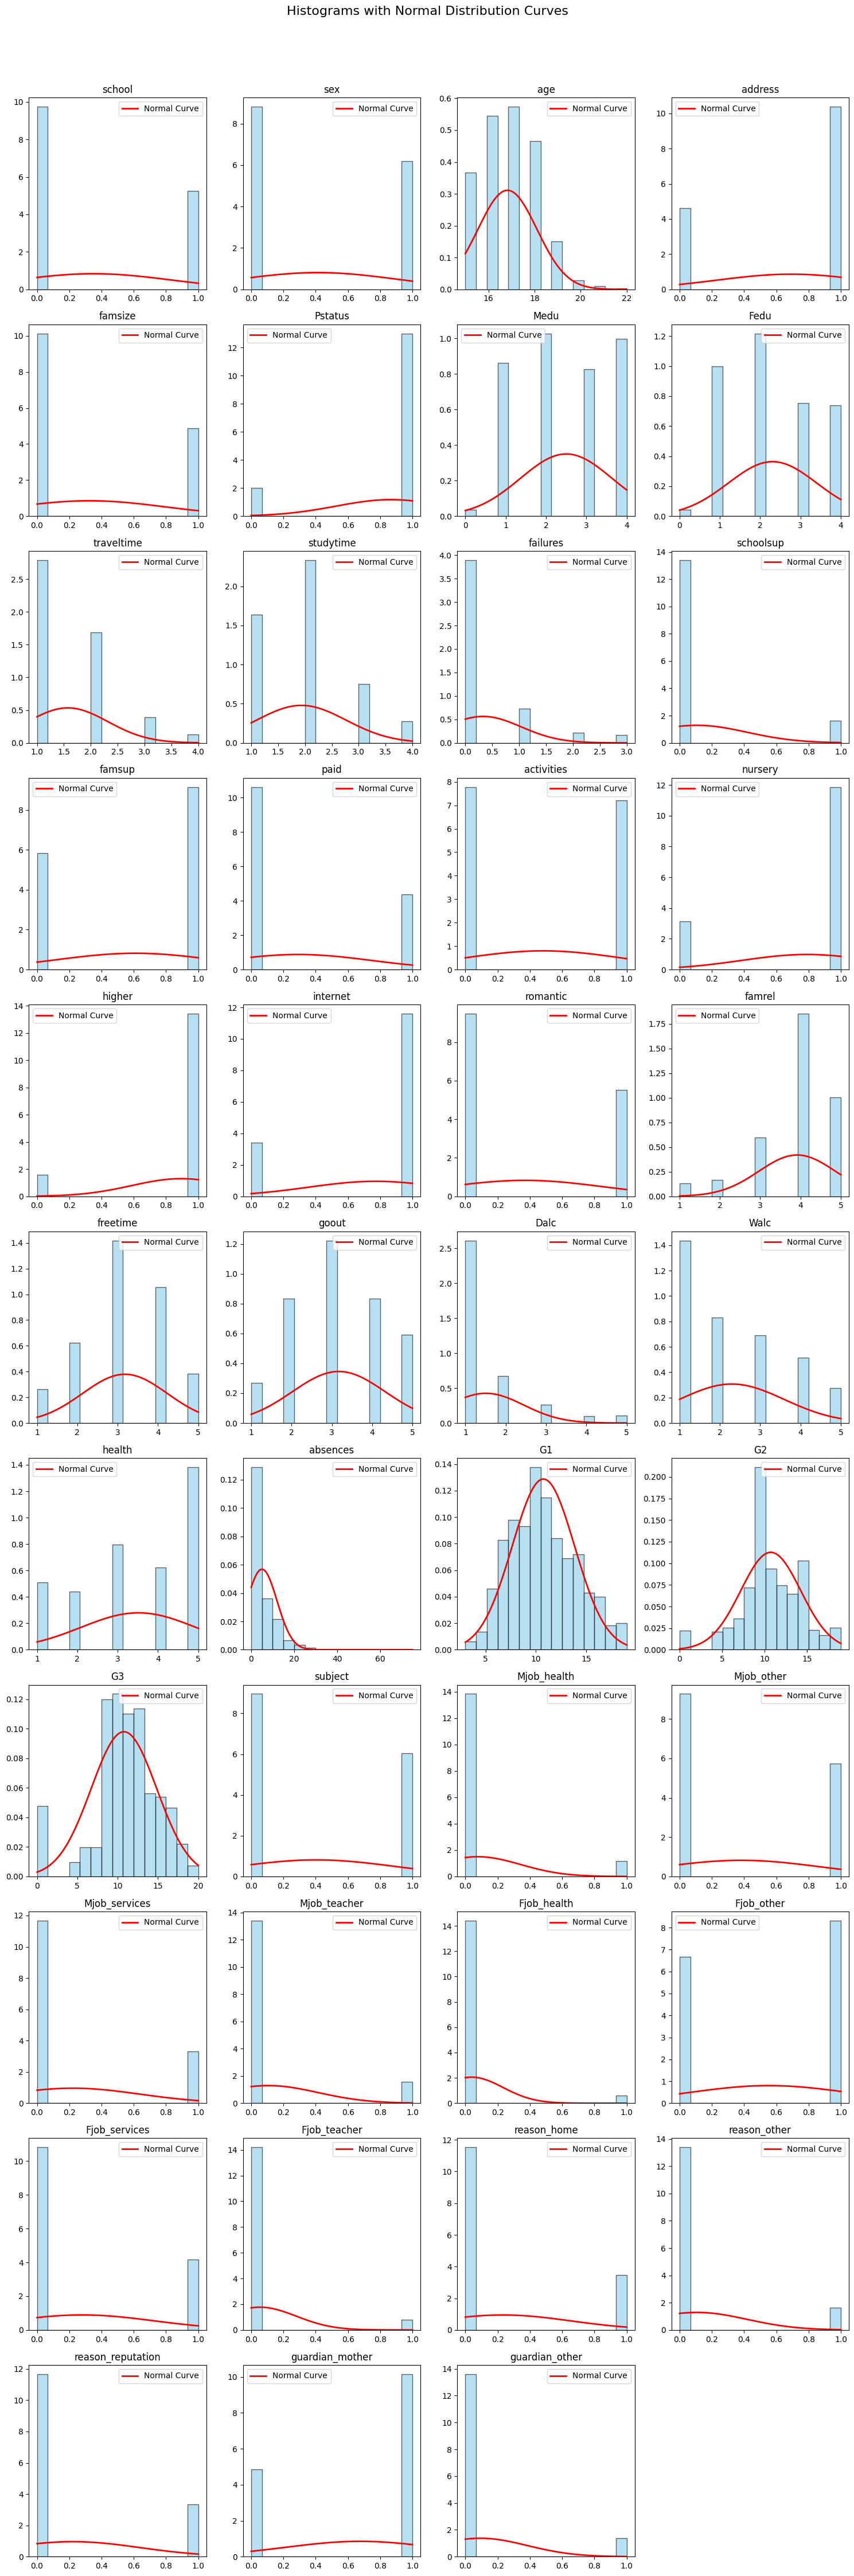

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

n_features = len(df_student.columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_student.columns):
    # Plot histogram
    data = df_student[column]
    axes[i].hist(data, bins=15, color='skyblue', edgecolor='black', density=True, alpha=0.6)
    
    # Calculate mean and std dev for normal distribution curve
    mean, std = np.mean(data), np.std(data)
    
    # Generate normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mean, std)
    
    # Plot normal distribution curve
    axes[i].plot(x, y, color='red', linewidth=2, label='Normal Curve')
    axes[i].set_title(column)
    axes[i].legend()

# Remove unused axes
for j in range(len(df_student.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histograms with Normal Distribution Curves', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

We can assess the distribution of each dataset feature by performing a skewness test, which evaluates the asymmetry of the data. A skewness value of 0 signifies a perfectly symmetrical distribution. Positive skewness indicates a right-skewed distribution, while negative skewness suggests a left-skewed distribution.

In [87]:
from scipy.stats import skew
import pandas as pd

pd.set_option('display.max_rows', None)

numeric_columns = df_student.select_dtypes(include=['int64', 'float64']).columns

skewness_results = {column: skew(df_student[column]) for column in numeric_columns}

skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Feature', 'Skewness'])

print(skewness_df)

pd.reset_option('display.max_rows')

              Feature  Skewness
0              school  0.625591
1                 sex  0.354546
2                 age  0.417901
3             address -0.830145
4             famsize  0.749052
5             Pstatus -2.151752
6                Medu -0.032421
7                Fedu  0.212820
8          traveltime  1.254160
9           studytime  0.699714
10           failures  2.352275
11          schoolsup  2.531509
12             famsup -0.451543
13               paid  0.914890
14         activities  0.075094
15            nursery -1.432822
16             higher -2.559176
17           internet -1.305113
18           romantic  0.544398
19             famrel -1.095575
20           freetime -0.197965
21              goout -0.003541
22               Dalc  2.115592
23               Walc  0.618086
24             health -0.471450
25           absences  3.823399
26                 G1  0.322198
27                 G2 -0.378030
28                 G3 -0.768634
29            subject  0.395784
30      

Upon analyzing the histograms and skewness results, the distribution of features in the dataset demonstrates a tendency toward right-skewed distributions, characterized by longer right tails. This is supported by positive skewness values for features such as famsize, traveltime, studytime, failures, schoolsup, Dalc, Walc, absences, paid, Mjob_health, Mjob_services, reason_home, reason_other, and Fjob_teacher.

Conversely, some features exhibit left-skewed distributions, with longer left tails. These include address, Pstatus, nursery, higher, internet, famrel, and health. Features with skewness values close to zero, such as sex, age, Medu, Fedu, guardian, activities, goout, G1, and G2, suggest relatively symmetrical distributions.

## Box Plot for Outlier Detection in numeric features

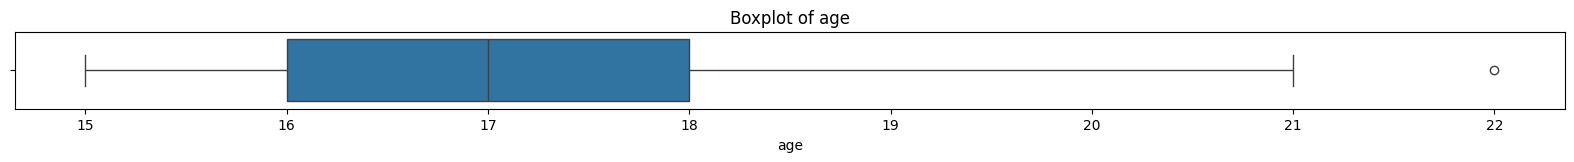

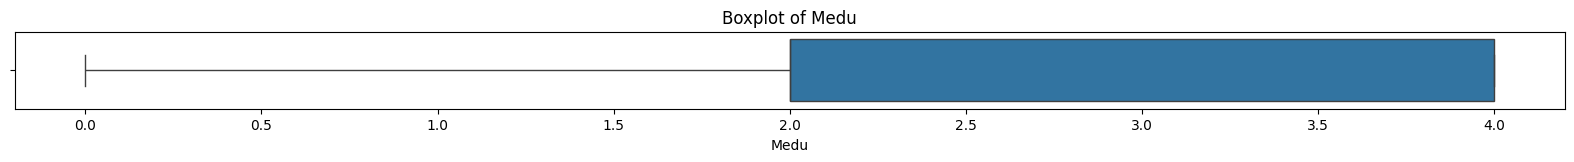

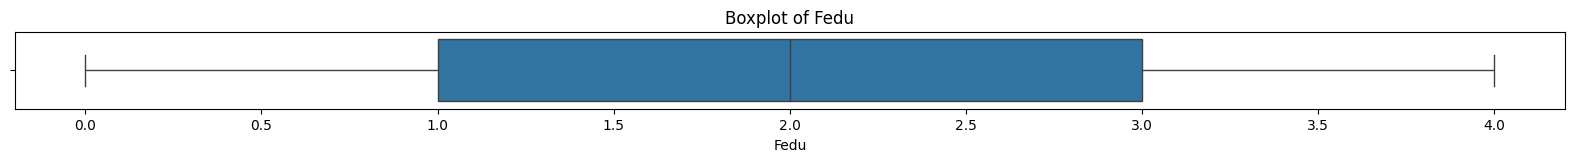

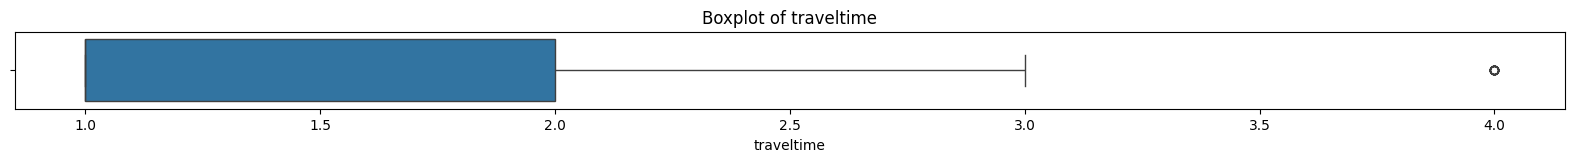

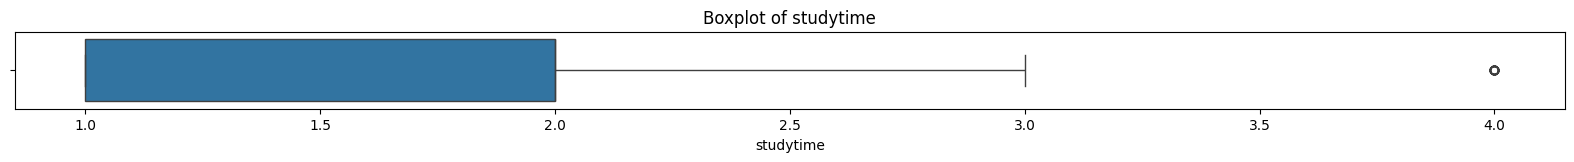

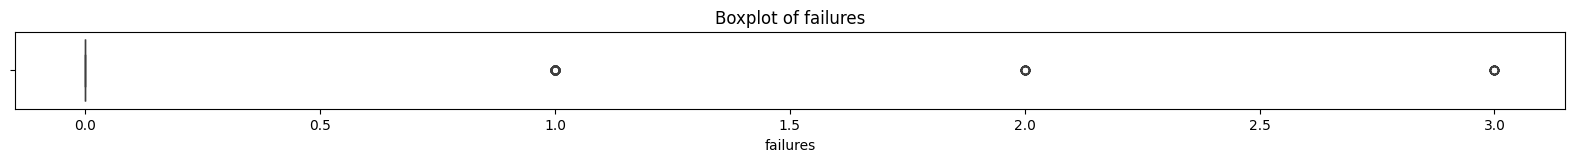

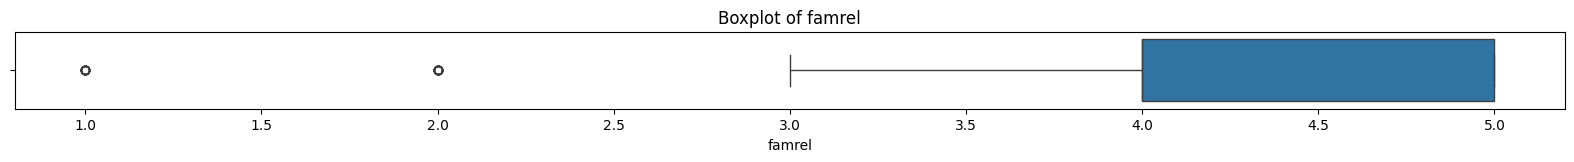

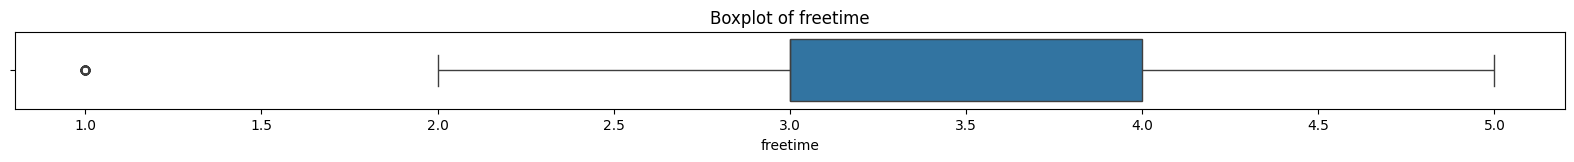

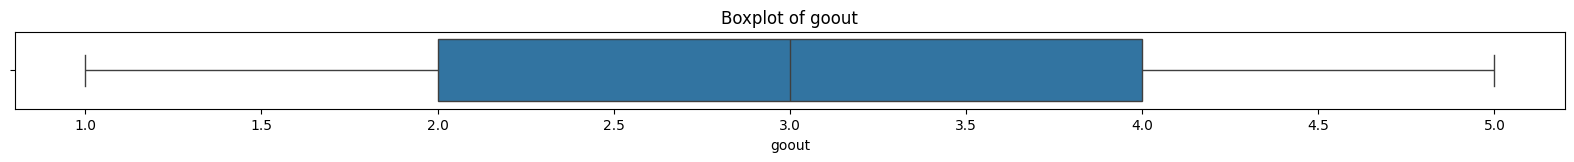

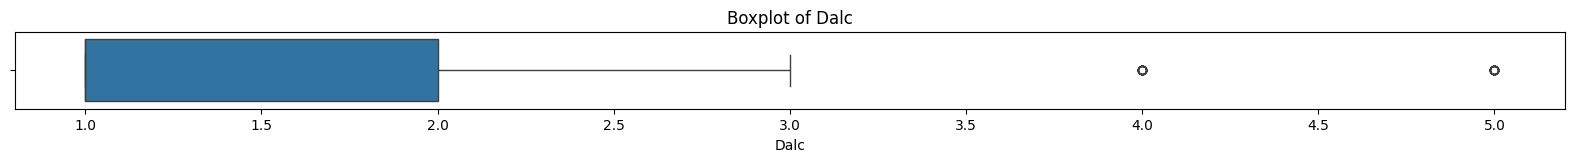

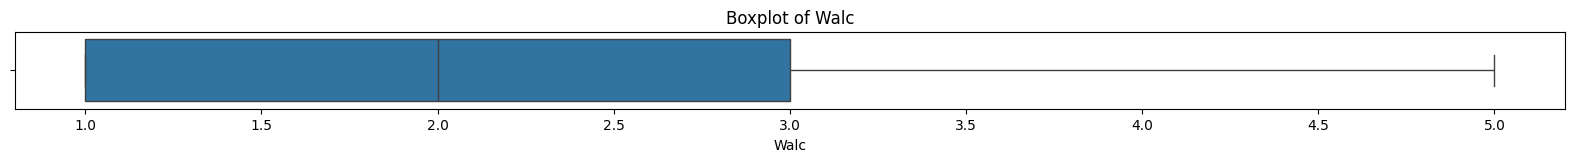

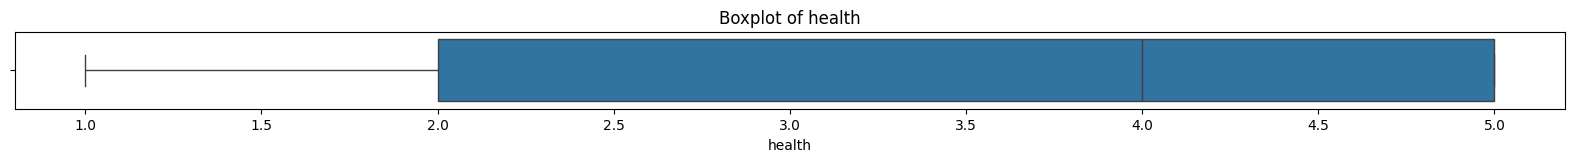

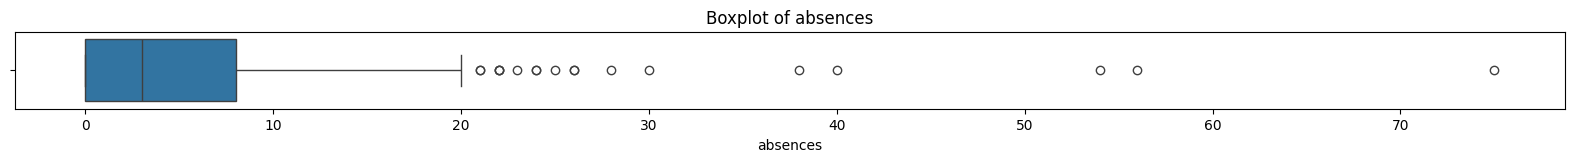

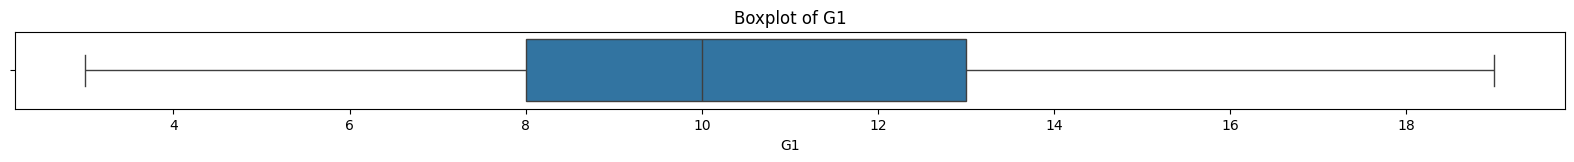

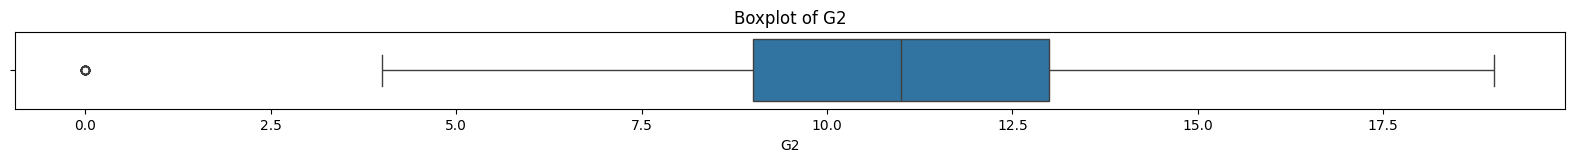

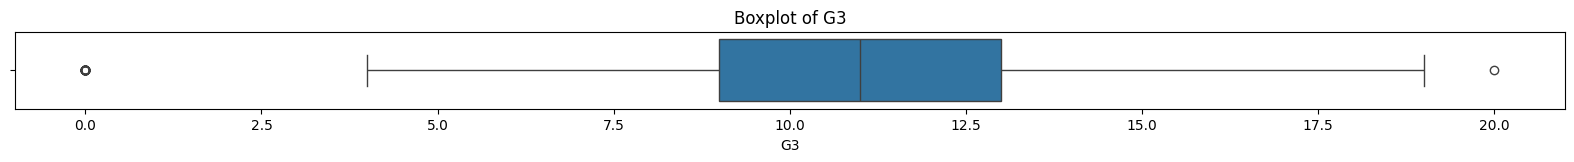

In [88]:
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                    'absences', 'G1', 'G2', 'G3']

for feature in numeric_features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df_student[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

## Correlation Analysis for numeric features

In [89]:
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

numeric_df = df_student[numeric_features].copy()

# Calculate the correlation matrix and print it
corr_matrix = numeric_df.corr()
print(corr_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.115743 -0.120977    0.007997   0.004441  0.296321   
Medu       -0.115743  1.000000  0.624183   -0.236237   0.102239 -0.164609   
Fedu       -0.120977  0.624183  1.000000   -0.190078   0.040185 -0.169679   
traveltime  0.007997 -0.236237 -0.190078    1.000000  -0.058990  0.068882   
studytime   0.004441  0.102239  0.040185   -0.058990   1.000000 -0.125660   
failures    0.296321 -0.164609 -0.169679    0.068882  -0.125660  1.000000   
famrel     -0.013133  0.005450  0.021285    0.000464   0.013550 -0.073113   
freetime    0.007489 -0.016001  0.008403   -0.003233  -0.075427  0.090668   
goout       0.102818  0.034358  0.061039    0.053524  -0.101479  0.048008   
Dalc        0.145094 -0.016416 -0.009001    0.082319  -0.142115  0.101161   
Walc        0.069797 -0.042859  0.026827    0.066138  -0.233137  0.098107   
health     -0.019944 -0.014816  0.034434   -0.030531  -0.054676  0.048239   

In [90]:
# Show the correlation values of 'G3' with other features
g3_corr = numeric_df.copy()
g3_corr['G3'] = df_student['G3']

g3_corr_result = g3_corr.corr()['G3']
print(g3_corr_result)

age          -0.116902
Medu          0.179252
Fedu          0.135628
traveltime   -0.068253
studytime     0.102336
failures     -0.360218
famrel        0.071941
freetime     -0.066130
goout        -0.078325
Dalc         -0.091314
Walc         -0.101529
health       -0.046317
absences     -0.021822
G1            0.795185
G2            0.915417
G3            1.000000
Name: G3, dtype: float64


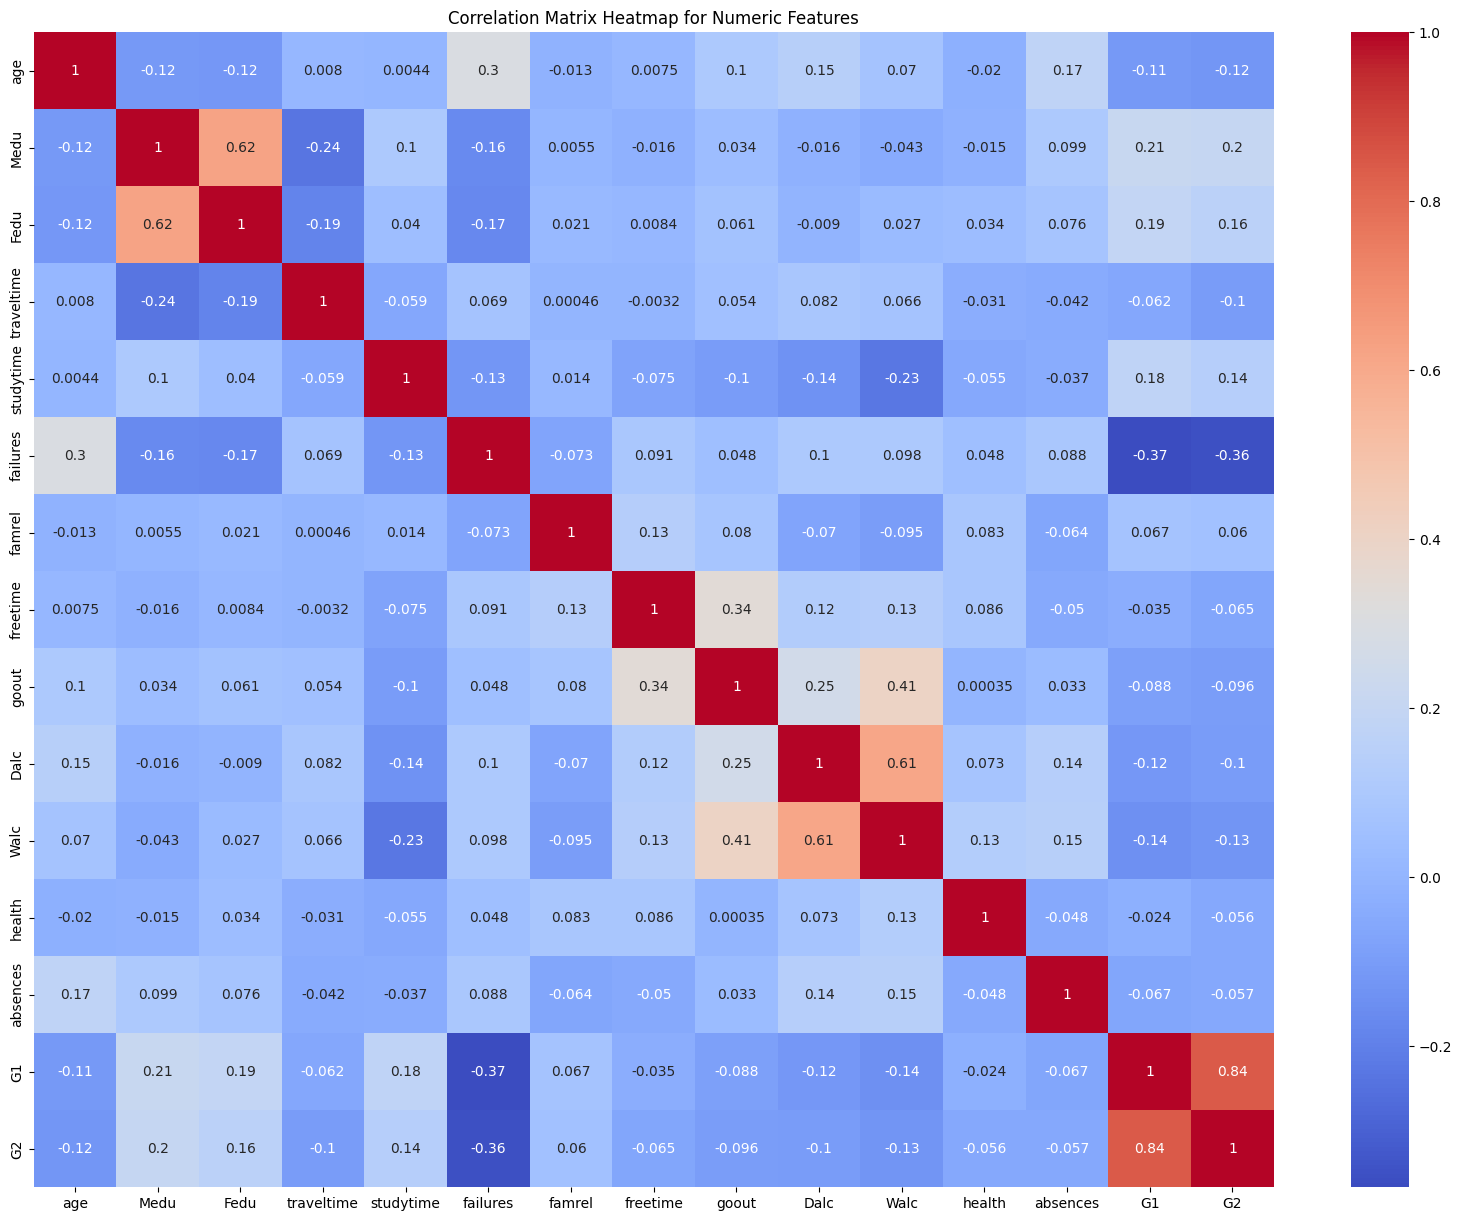

    Feature 1 Feature 2  Correlation
209        G1        G2     0.844777
223        G2        G1     0.844777


In [91]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar=True)
plt.title("Correlation Matrix Heatmap for Numeric Features")
plt.show()

# Extract significant correlations (correlation > 0.8 or < -0.8)
significant_correlations = corr_matrix.unstack().reset_index()
significant_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out self-correlations and keep only strong correlations
significant_correlations = significant_correlations[
    (abs(significant_correlations['Correlation']) > 0.8) & (significant_correlations['Feature 1'] != significant_correlations['Feature 2'])
]

# Sort the correlations by their absolute value
significant_correlations_sorted = significant_correlations.sort_values(by='Correlation', ascending=False)

# Show the sorted significant correlations
print(significant_correlations_sorted)

In [92]:
significant_correlations_sorted['Pair'] = significant_correlations_sorted.apply(
    lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1
)

unique_pairs = significant_correlations_sorted.drop_duplicates(subset='Pair').drop(columns=['Pair'])

display(unique_pairs)

,Feature 1,Feature 2,Correlation
209,G1,G2,0.844777


In [93]:
# Compute the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold for high correlation
threshold = 0.8

# Identify features to drop, keeping the one with the highest correlation to the target
features_to_drop = set()
for column in upper_triangle.columns:
    # Find features highly correlated with the current column
    high_corr_features = upper_triangle.index[upper_triangle[column] > threshold].tolist()
    # Exclude the column itself and add others to the drop list
    features_to_drop.update(high_corr_features)

# Keep the most relevant feature (`G2`) and remove others (`G1`)
# We drop G1 as its correlation is to 0.8
features_to_drop = features_to_drop - {'G3'}

# Drop the selected features
numeric_df_dropped = numeric_df.drop(columns=features_to_drop)
df_student = df_student.drop(columns=features_to_drop)

# Recalculate the correlation matrix for the reduced numeric dataset
corr_matrix_dropped = numeric_df_dropped.corr()

# Display results
print("Dropped Features:", features_to_drop)

# df_student
# the new dataset is within df_student

Dropped Features: {'G1'}


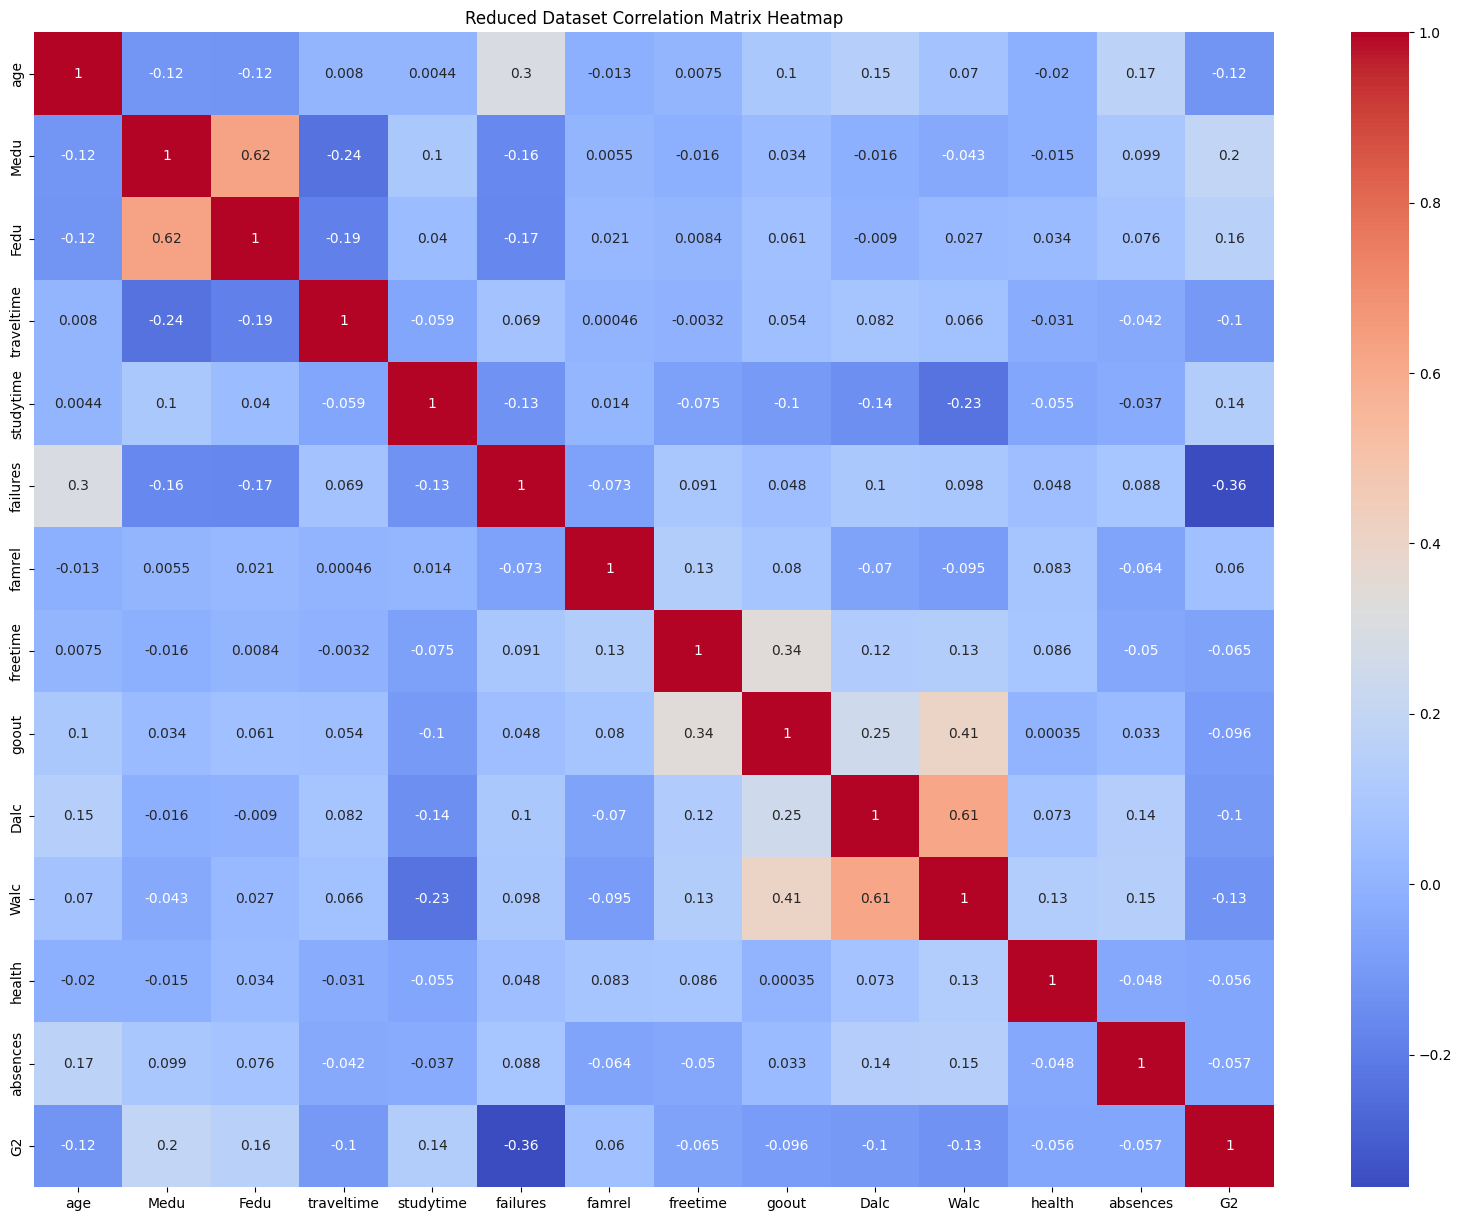

In [94]:
# Plot the new heatmap for the reduced dataset
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_dropped, cmap='coolwarm', annot=True, cbar=True)
plt.title("Reduced Dataset Correlation Matrix Heatmap")
plt.show()

# Identify significant correlations
significant_correlations_dropped = corr_matrix_dropped.unstack().reset_index()
significant_correlations_dropped.columns = ['Feature 1', 'Feature 2', 'Correlation']
significant_correlations_dropped = significant_correlations_dropped[
    (abs(significant_correlations_dropped['Correlation']) > 0.8) & 
    (significant_correlations_dropped['Feature 1'] != significant_correlations_dropped['Feature 2'])
]

# Sort by absolute correlation values
significant_correlations_sorted_dropped = significant_correlations_dropped.sort_values(by='Correlation', ascending=False)

### Feature Selection

Based on the correlation values with the target variable (G3) presented in the earlier exploratory data analysis (EDA), it appears that G2 shows a relatively strong positive correlation with G3. Therefore, for model training, we will include G2 as part of our feature set. Given that G2 was strongly correlated with G1, we have dropped G1 from the feature set to avoid high collinearity issues.

## 6. Model Training

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

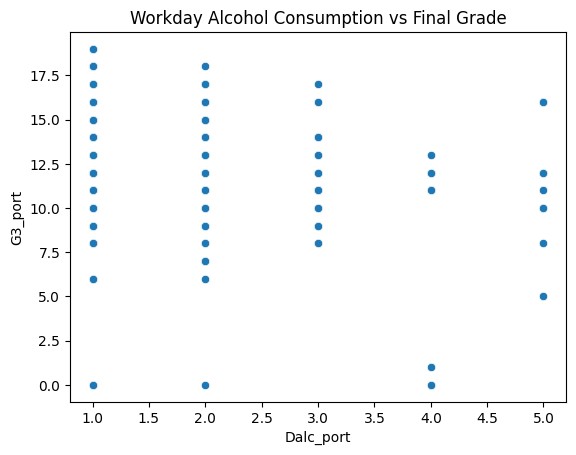

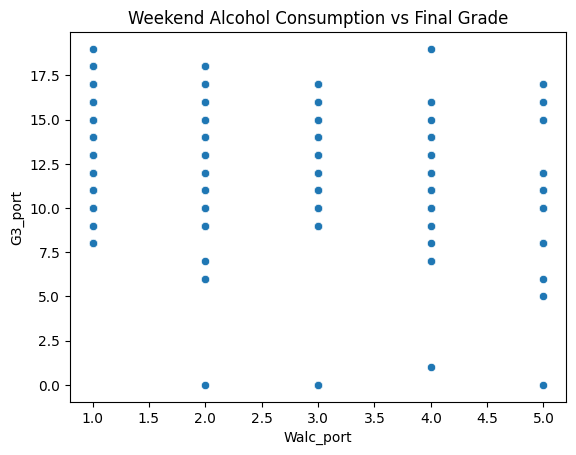

In [ ]:
#Initial Port first than merged or Mat. This is just for visualizing relations.
sns.scatterplot(x=LiR_data['Dalc_port'], y=LiR_data['G3_port'])
plt.title('Workday Alcohol Consumption vs Final Grade')
plt.show()

sns.scatterplot(x=LiR_data['Walc_port'], y=LiR_data['G3_port'])
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.show()


### 2D Dalc vs G3

In [ ]:
# Work day split
X_port = LiR_data[['Dalc_port']]
y_port = LiR_data['G3_port']

X_train, X_test, y_train, y_test = train_test_split(X_port, y_port, test_size=0.2, random_state=42)

# Create/Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Metrics

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Check the coefficients of Dalc to understand their impact on G3.
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 8.812239786181625
R-squared: 0.0642972582780389
Coefficients: [-0.88556057]
Intercept: 13.923333426738028


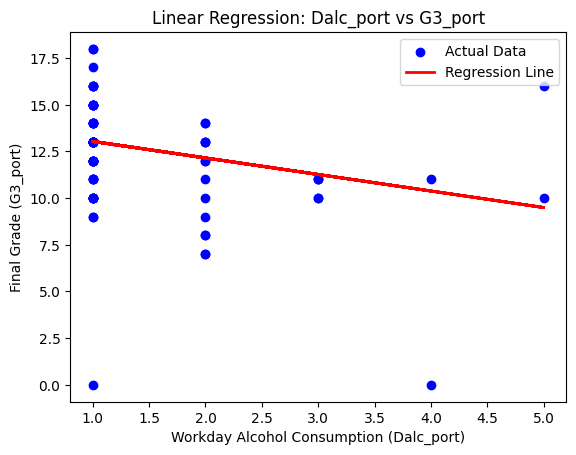

In [ ]:
# Scatter plot of the actual data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Workday Alcohol Consumption (Dalc_port)')
plt.ylabel('Final Grade (G3_port)')
plt.title('Linear Regression: Dalc_port vs G3_port')
plt.legend()
plt.show()

### 3D Dalc, Walc, and G3 Port

In [ ]:
#Split data

X_port = LiR_data[['Dalc_port', 'Walc_port']]
y_port = LiR_data['G3_port']

X_train, X_test, y_train, y_test = train_test_split(X_port, y_port, test_size=0.2, random_state=42)


In [ ]:
# Create/Train model

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Metrics

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.989946623009155
R-squared: 0.04542796074678013


In [ ]:
# Check the coefficients of Dalc and Walc to understand their impact on G3.
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [-0.61787861 -0.28707675]
Intercept: 14.194723800756595


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


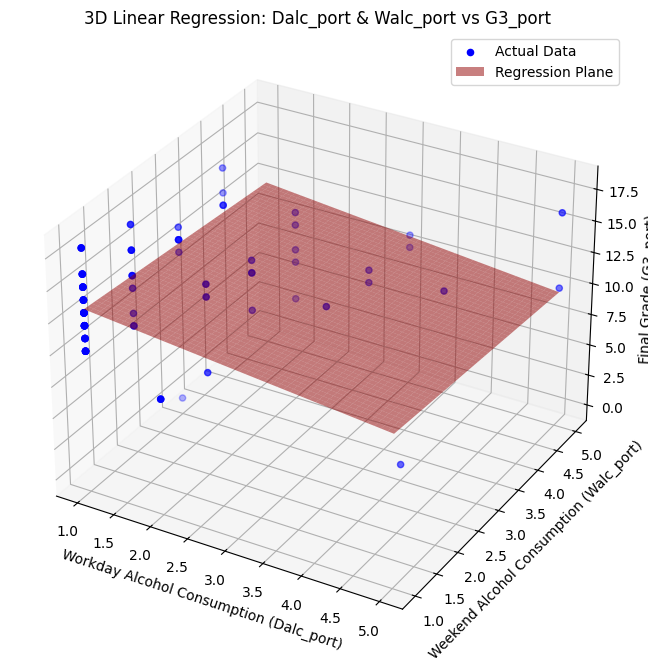

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Meshgrid for 3D plotting
Dalc_vals, Walc_vals = numpy.meshgrid(
    numpy.linspace(X_port['Dalc_port'].min(), X_port['Dalc_port'].max(), 50),
    numpy.linspace(X_port['Walc_port'].min(), X_port['Walc_port'].max(), 50)
)

# Predict G3_port for the grid values
Z = model.predict(numpy.c_[Dalc_vals.ravel(), Walc_vals.ravel()]).reshape(Dalc_vals.shape)

# Plot the data points and the regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X_test['Dalc_port'], X_test['Walc_port'], y_test, color='blue', label='Actual Data')

# Regression plane
ax.plot_surface(Dalc_vals, Walc_vals, Z, color='red', alpha=0.5, label='Regression Plane')

# Labels and title
ax.set_xlabel('Workday Alcohol Consumption (Dalc_port)')
ax.set_ylabel('Weekend Alcohol Consumption (Walc_port)')
ax.set_zlabel('Final Grade (G3_port)')
ax.set_title('3D Linear Regression: Dalc_port & Walc_port vs G3_port')
plt.legend()
plt.show()


In [ ]:
# Data is cleaned so i guess we go straight into it.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# G2 and G1 were dropped
X = numeric_df_dropped.drop(columns=['G3']) #Highly corr features noped
y = numeric_df_dropped['G3'] #For final grade

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiate and fit the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Sanity Check: Should have an accuracy of 0.076... abysmally low compared to other

Accuracy: 0.07608695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           5       0.00      0.00      0.00         2
           6       0.06      0.25      0.10         4
           7       0.05      0.40      0.09         5
           8       0.17      0.06      0.09        17
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        15
          16       0.05      0.12      0.07         8
          17       0.00      0.00      0.00         2
          18       0.06      0.20      0.09        10
          19       0.00      0.00      0.00         1

    accuracy              

d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Refine class labels for Naive Bayes?
def refine_labels(g3):
    if g3 <= 7:
        return 0  # Low grades
    elif g3 <= 13:
        return 1  # Medium grades
    else:
        return 2  # High grades

In [ ]:
numeric_df_dropped['G3_nb'] = numeric_df_dropped['G3'].apply(refine_labels)

# G2 and G1 were dropped
X = numeric_df_dropped.drop(columns=['G3', 'G3_nb'], axis=1) #Highly corr features noped
y = numeric_df_dropped['G3_nb'] #For final grade

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Sanity Check: Accuracy of 0.30...!

Accuracy: 0.30434782608695654
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.70      0.30        23
           1       0.80      0.03      0.07       115
           2       0.38      0.78      0.51        46

    accuracy                           0.30       184
   macro avg       0.46      0.50      0.29       184
weighted avg       0.62      0.30      0.21       184



#### Hyperparam tuning

In [ ]:
from sklearn.model_selection import cross_val_score, ParameterGrid
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]# Smoothing parameter
}

# Create the ParameterGrid object
grid = ParameterGrid(param_grid)

# Track the best score and parameters
best_score = 0
best_params = None

# Iterate through each combination of parameters
for params in grid:
    # Train the model with current parameters
    model = GaussianNB(**params)
    model.fit(X_train, y_train)
    
    # Use cross-validation for performance evaluation
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    print(f"Evaluating model with parameters: {params}")
    print(f"Accuracy: {score}")
    
    # Track the best model
    if score > best_score:
        best_score = score
        best_params = params

print(f"\nBest parameters: {best_params}")
print(f"Best accuracy: {best_score}")


Evaluating model with parameters: {'var_smoothing': 1e-09}
Accuracy: 0.30434782608695654
Evaluating model with parameters: {'var_smoothing': 1e-08}
Accuracy: 0.32608695652173914
Evaluating model with parameters: {'var_smoothing': 1e-07}
Accuracy: 0.3532608695652174

Best parameters: {'var_smoothing': 1e-07}
Best accuracy: 0.3532608695652174


### Multinomial Naive Bayes

#### Straight

Assuming Multinomial due to frequency of drinking? Anyways

In [ ]:
# Data is cleaned so i guess we go straight into it.
# visual_df_dropped
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# G2 and G1 were dropped
X = numeric_df_dropped.drop(columns=['G3', 'G3_nb'], axis=1) #Highly corr features noped
y = numeric_df_dropped['G3'] #For final grade

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Instantiate and fit the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Sanity Check: Should have an accuracy of 0.15...

Accuracy: 0.15217391304347827
Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40        12
           5       0.00      0.00      0.00         2
           6       0.33      0.25      0.29         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        17
           9       0.04      0.10      0.06        10
          10       0.12      0.12      0.12        32
          11       0.21      0.17      0.19        30
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        15
          14       0.22      0.40      0.29        10
          15       0.08      0.07      0.07        15
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00        10
          19       0.00      0.00      0.00         1

    accuracy              

d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Permuted Feature Importance: Feature importance via permutation with trained model

from sklearn.inspection import permutation_importance

importance = permutation_importance(nb_model, X_test, y_test, n_repeats=30, random_state=42)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance.importances_mean})
print(feature_importance.sort_values(by='Importance', ascending=False))


              Feature  Importance
26           absences    0.048551
28        Mjob_health    0.006341
11           failures    0.003986
23               Dalc    0.003986
2                 age    0.003986
16            nursery    0.001812
20             famrel    0.001449
18           internet    0.001449
5             Pstatus    0.000543
35       Fjob_teacher    0.000543
8            guardian    0.000362
1                 sex    0.000000
37       reason_other   -0.000725
22              goout   -0.000906
9          traveltime   -0.001087
6                Medu   -0.001630
32        Fjob_health   -0.001630
25             health   -0.002899
4             famsize   -0.002899
27            subject   -0.003804
7                Fedu   -0.004348
30      Mjob_services   -0.004529
17             higher   -0.005072
38  reason_reputation   -0.005978
34      Fjob_services   -0.006159
15         activities   -0.006522
36        reason_home   -0.007065
10          studytime   -0.007246
31       Mjob_

So absences, and Failures dominant features. for impacting G3 -- These are features that have the strongest impact on final grade (Question 1)

G3 corr with walc and dalc.

In [ ]:
print(numeric_df_dropped[['Dalc', 'Walc', 'G3']].corr())


          Dalc      Walc        G3
Dalc  1.000000  0.614092 -0.091314
Walc  0.614092  1.000000 -0.101529
G3   -0.091314 -0.101529  1.000000


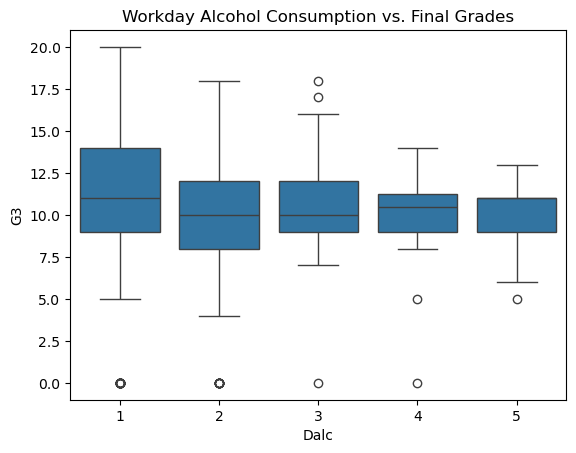

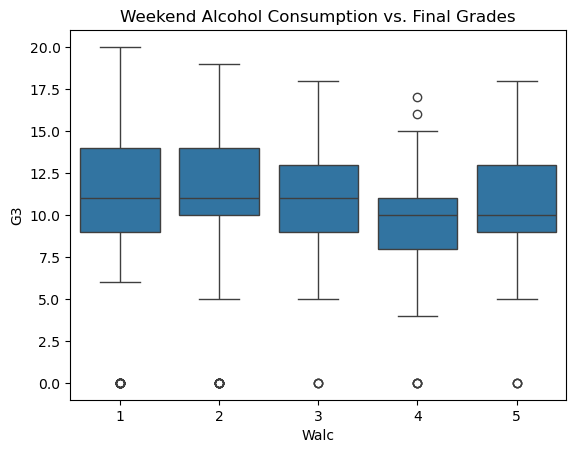

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Workday Alcohol Consumption
sns.boxplot(x='Dalc', y='G3', data=numeric_df_dropped)
plt.title("Workday Alcohol Consumption vs. Final Grades")
plt.show()

# Boxplot for Weekend Alcohol Consumption
sns.boxplot(x='Walc', y='G3', data=numeric_df_dropped)
plt.title("Weekend Alcohol Consumption vs. Final Grades")
plt.show()


##### Q2 in a way
##### Workday Alcohol Consumption (Dalc)
- Students with lower workday alcohol consumption (Dalc=1 or 2) tend to have slightly higher median final grades.
- As workday alcohol consumption increases (Dalc=4 or 5), median grades appear to decline, with more outliers scoring low.
- The spread of grades is broader for lower levels of alcohol consumption, suggesting more variability.
##### Weekend Alcohol Consumption (Walc)
- Similar to workday trends, students with lower weekend alcohol consumption (Walc=1 or 2) tend to perform better, with higher median grades.
- Higher weekend alcohol consumption (Walc=4 or 5) is associated with lower grades, and the variability decreases.

## 7. Error Analysis


Idnetifying Instances of High Error

In [ ]:
y_test_math = y_test_math.reset_index(drop=True)
y_test_port = y_test_port.reset_index(drop=True)

errors_math = abs(y_test_math - y_pred_math_test)  # Absolute errors for Math
errors_port = abs(y_test_port - y_pred_port_test)  # Absolute errors for Portuguese

threshold = 5

high_error_indices_math = numpy.where(errors_math > threshold)[0]
high_error_indices_port = numpy.where(errors_port > threshold)[0]

print(f'High error instances for Math predictions (Threshold = {threshold})')
for idx in high_error_indices_math:
    print(f'Instance {idx}: Actual = {y_test_math.iloc[idx]}, Predicted = {y_pred_math_test[idx]}, Error = {errors_math[idx]}')

print(f'\nHigh error instances for Portuguese predictions (Threshold = {threshold})')
for idx in high_error_indices_port:
    print(f'Instance {idx}: Actual = {y_test_port.iloc[idx]}, Predicted = {y_pred_port_test[idx]}, Error = {errors_port[idx]}')


High error instances for Math predictions (Threshold = 5)
Instance 3: Actual = 0, Predicted = 8.0, Error = 8.0
Instance 5: Actual = 7, Predicted = 13.0, Error = 6.0
Instance 8: Actual = 5, Predicted = 13.0, Error = 8.0
Instance 21: Actual = 13, Predicted = 6.0, Error = 7.0
Instance 22: Actual = 15, Predicted = 0.0, Error = 15.0
Instance 34: Actual = 0, Predicted = 14.0, Error = 14.0
Instance 41: Actual = 10, Predicted = 0.0, Error = 10.0
Instance 43: Actual = 12, Predicted = 0.0, Error = 12.0
Instance 48: Actual = 7, Predicted = 13.0, Error = 6.0
Instance 55: Actual = 10, Predicted = 16.0, Error = 6.0
Instance 60: Actual = 6, Predicted = 0.0, Error = 6.0
Instance 61: Actual = 18, Predicted = 11.0, Error = 7.0
Instance 62: Actual = 10, Predicted = 20.0, Error = 10.0
Instance 63: Actual = 0, Predicted = 15.0, Error = 15.0
Instance 64: Actual = 0, Predicted = 15.0, Error = 15.0
Instance 67: Actual = 15, Predicted = 8.0, Error = 7.0
Instance 77: Actual = 7, Predicted = 0.0, Error = 7.0
Ins

Error Visualization

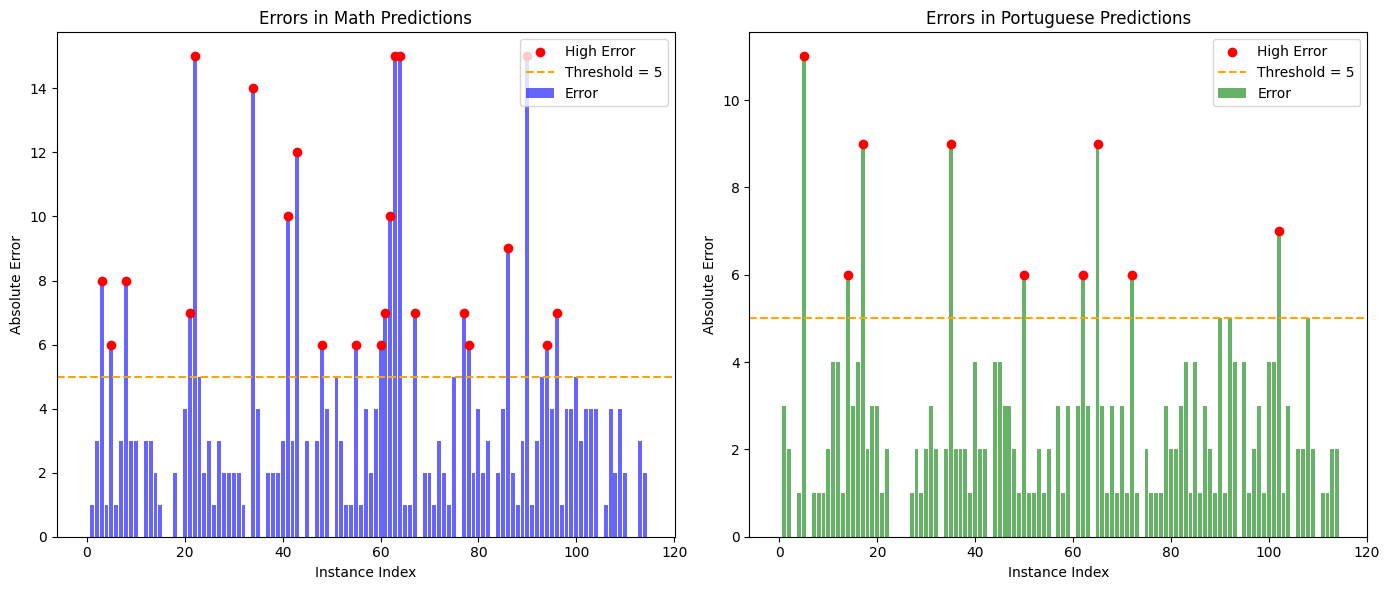

In [ ]:
high_error_indices_math = numpy.where(errors_math > threshold)[0]
high_error_indices_port = numpy.where(errors_port > threshold)[0]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(errors_math)), errors_math, color='blue', alpha=0.6, label='Error')
plt.scatter(high_error_indices_math, errors_math[high_error_indices_math], color='red', label='High Error', zorder=5)
plt.axhline(threshold, color='orange', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Errors in Math Predictions')
plt.xlabel('Instance Index')
plt.ylabel('Absolute Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(len(errors_port)), errors_port, color='green', alpha=0.6, label='Error')
plt.scatter(high_error_indices_port, errors_port[high_error_indices_port], color='red', label='High Error', zorder=5)
plt.axhline(threshold, color='orange', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Errors in Portuguese Predictions')
plt.xlabel('Instance Index')
plt.ylabel('Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

Instances with Errors Visualization